In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('bank.csv')
df.head()


Saving bank.csv to bank (2).csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Check the basic structure of the dataset
df.info()

# Summary statistics of the dataset
df.describe(include='all')

# Check the distribution of the target variable ('y')
df['deposit'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


,count
deposit,
no,5873
yes,5289


In [ ]:
df_cleaned = df.drop(columns=['duration'])
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
print("Missing values per column:\n", df_cleaned.isnull().sum())


Missing values per column:
 age                    0
balance                0
day                    0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other        

In [ ]:
X = df_cleaned.drop(columns=['deposit_yes'])
y = df_cleaned['deposit_yes']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Class distribution:\n", y.value_counts(normalize=True))


Class distribution:
 deposit_yes
False    0.52616
True     0.47384
Name: proportion, dtype: float64


In [ ]:
clf = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.77      0.71      1166
        True       0.70      0.58      0.63      1067

    accuracy                           0.68      2233
   macro avg       0.68      0.67      0.67      2233
weighted avg       0.68      0.68      0.67      2233



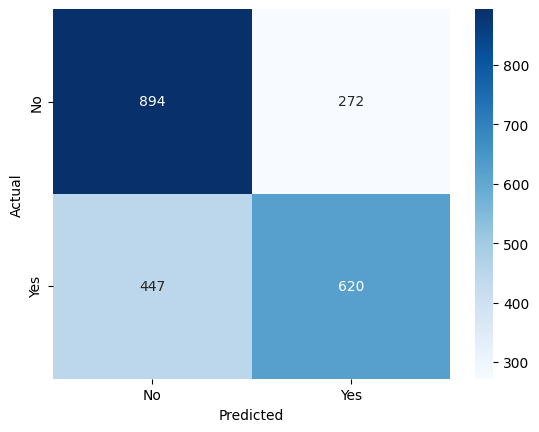

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}\n')
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Initialize GridSearchCV with the Decision Tree Classifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


Fine-Tuned Accuracy: 0.71
              precision    recall  f1-score   support

       False       0.67      0.87      0.75      1166
        True       0.79      0.53      0.63      1067

    accuracy                           0.71      2233
   macro avg       0.73      0.70      0.69      2233
weighted avg       0.72      0.71      0.70      2233



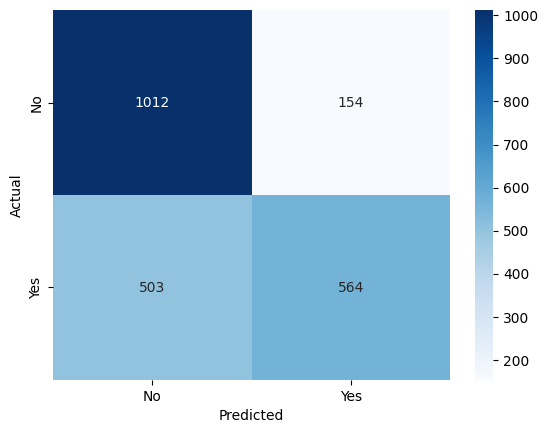

In [ ]:
# Use the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Evaluate the performance of the fine-tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Fine-Tuned Accuracy: {accuracy_best:.2f}')

# Print the classification report for the fine-tuned model
print(classification_report(y_test, y_pred_best))

# Plot the confusion matrix for the fine-tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()